In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Javiera_Research')

In [ ]:
!ls

 cleaned_data  'General presentation.gslides'   notebooks


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

# list of variables

* `df_1yr`
  * dataframe containing 74 columns
    * 71 columns of interest, 
    * plus 1 column of patient `eid` and 
    * 2 columns that indicates the time lapse between the 2 questinnaires and the date of attending assessment center
  * contains all samples who have done both questionnaires within 6 months of attending the assessment center
  * did not clean out any `Null` or negative values 

* `df_1yr_float`
  * `df_1yr` but only with columns who are of `float64` as their `dtype`



* `1yr_missing_value_df`
  * dataframe containing the percentage of missing values in `df_1yr` for each feature 

* `df_og`
  * the original dataframe with all the samples, but only the 72 columns of interest

# load cleaned data

In [ ]:
# df_1yr = pd.read_csv('cleaned_data/ukb43673_74cols_1yr.csv')
df_1yr = pd.read_csv('cleaned_data/ukb43673_76cols_1yr.csv')
df_1yr

,53-2.0,1920-2.0,1930-2.0,1940-2.0,1950-2.0,1960-2.0,1970-2.0,1980-2.0,1990-2.0,2000-2.0,2010-2.0,2020-2.0,2030-2.0,2050-2.0,2060-2.0,2070-2.0,2080-2.0,20400-0.0,20505-0.0,20506-0.0,20507-0.0,20508-0.0,20509-0.0,20510-0.0,20511-0.0,20512-0.0,20513-0.0,20514-0.0,20515-0.0,20516-0.0,20517-0.0,20518-0.0,20519-0.0,20520-0.0,21003-2.0,21023-0.0,21024-0.0,21028-0.0,21029-0.0,21030-0.0,21031-0.0,21032-0.0,21033-0.0,21034-0.0,21035-0.0,21036-0.0,21037-0.0,21038-0.0,21039-0.0,21040-0.0,21041-0.0,21042-0.0,21043-0.0,21044-0.0,21045-0.0,21047-0.0,21048-0.0,21049-0.0,21051-0.0,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0,21064-0.0,21065-0.0,21068-0.0,eid,31-0.0,21025-0.0,time_lapse1,time_lapse2
0,2017-06-21,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-07-28,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,59.0,2017-04-11,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-501.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,3.0,5.0,1.0,NaN,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-601.0,-601.0,0.0,0.0,0.0,NaN,NaN,NaN,328 days,71 days
1,2017-08-16,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-09-30,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,78.0,2017-08-24,0.0,-500.0,-500.0,-500.0,-500.0,-500.0,-503.0,-501.0,0.0,NaN,NaN,0.0,NaN,8.0,0.0,1.0,7.0,1.0,NaN,NaN,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,0.0,-121.0,0.0,NaN,NaN,NaN,320 days,-8 days
2,2016-05-25,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2016-08-18,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,64.0,2017-04-28,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-501.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,2.0,6.0,1.0,NaN,NaN,-600.0,-602.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,1.0,0.0,0.0,NaN,NaN,NaN,-85 days,-338 days
3,2017-02-15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2016-09-13,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,54.0,2017-05-11,0.0,-503.0,-500.0,-501.0,-501.0,-502.0,-501.0,-501.0,1.0,2.0,1.0,0.0,NaN,3.0,1.0,1.0,3.0,1.0,NaN,NaN,-601.0,-601.0,-601.0,-601.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-601.0,0.0,-121.0,0.0,NaN,NaN,NaN,155 days,-85 days
4,2016-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-08-24,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,59.0,2017-05-05,0.0,NaN,NaN,NaN,NaN,NaN,-501.0,-500.0,0.0,NaN,NaN,0.0,NaN,1.0,2.0,2.0,3.0,1.0,NaN,NaN,-600.0,-601.0,-601.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-601.0,0.0,0.0,0.0,NaN,NaN,NaN,-85 days,-339 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,2016-07-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-08-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0,2017-05-04,0.0,-504.0,-503.0,-500.0,-503.0,-500.0,-500.0,-500.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,3.0,1.0,2.0,NaN,NaN,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,0.0,0.0,0.0,6021110.0,1.0,1.0,-25 days,-283 days
6283,2016-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-12-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.0,2017-04-28,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-500.0,0.0,NaN,NaN,0.0,NaN,2.0,0.0,2.0,7.0,1.0,NaN,NaN,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-602.0,-600.0,-600.0,-601.0,0.0,0.0,0.0,6022430.0,1.0,0.0,6 days,-131 days
6284,2017-09-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-09-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.0,2017-05-20,0.0,-500.0,-500.0,-500.0,-500.0,-500.0,-501.0,-501.0,1.

# look into into age

age has the feature ID `21003-2.0`

## 1 year data

In [ ]:
df_1yr['21003-2.0'].isnull().sum()
# our age columns does not have any missing values

0

Text(0, 0.5, 'count')

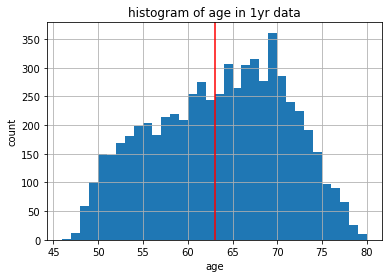

In [ ]:
df_1yr['21003-2.0'].hist(bins=int(max(df_1yr['21003-2.0']) - min(df_1yr['21003-2.0'])))
  # make a bin for each integer age
plt.title('histogram of age in 1yr data')
plt.axvline(x=np.mean(df_1yr['21003-2.0']), color = "red")
plt.xlabel('age')
plt.ylabel('count')

## entire data

In [ ]:
# to get the age distribution from the entire dataset (the smaller one with only 72 features we are interested in)

In [ ]:
# notebook saved on Greene cluster 

# look into into sex

age has the feature ID `31-0.0`

## 1 year data

In [ ]:
df_1yr['31-0.0'].isnull().sum()
# our sex columns contains missing values

23

Text(0, 0.5, 'count')

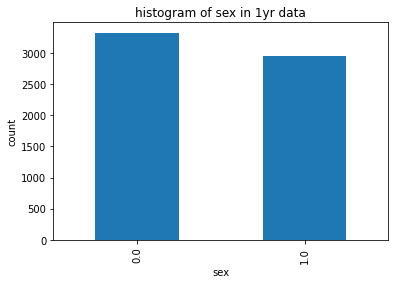

In [ ]:
df_1yr['31-0.0'].value_counts().plot(kind='bar')
plt.title('histogram of sex in 1yr data')
# plt.axvline(x=np.mean(df_1yr['21003-2.0']), color = "red")
plt.xlabel('sex')
plt.ylabel('count')

## entire data

In [ ]:
# to get the age distribution from the entire dataset (the smaller one with only 72 features we are interested in)

In [ ]:
# notebook saved on Greene cluster 

# look into missing data

In [ ]:
df_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   53-2.0       6287 non-null   object 
 1   1920-2.0     6255 non-null   float64
 2   1930-2.0     6255 non-null   float64
 3   1940-2.0     6255 non-null   float64
 4   1950-2.0     6255 non-null   float64
 5   1960-2.0     6255 non-null   float64
 6   1970-2.0     6255 non-null   float64
 7   1980-2.0     6255 non-null   float64
 8   1990-2.0     6255 non-null   float64
 9   2000-2.0     6255 non-null   float64
 10  2010-2.0     6255 non-null   float64
 11  2020-2.0     6255 non-null   float64
 12  2030-2.0     6255 non-null   float64
 13  2050-2.0     6255 non-null   float64
 14  2060-2.0     6255 non-null   float64
 15  2070-2.0     6255 non-null   float64
 16  2080-2.0     6255 non-null   float64
 17  20400-0.0    6287 non-null   object 
 18  20505-0.0    6286 non-null   float64
 19  20506-

In [ ]:
# from the above, column 21047-0.0 only has 253 non-null values
# it corresponds to Number of weeks (in the last year) at work suffering because of IBS

In [ ]:
df_1yr['21047-0.0']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6282    NaN
6283    NaN
6284    NaN
6285    0.0
6286    NaN
Name: 21047-0.0, Length: 6287, dtype: float64

In [ ]:
# look at the fraction of null values overall
print("percent of missing values over all:", 
      (df_1yr.isnull().sum().sum())/(len(df_1yr) * len(df_1yr.columns))*100)

percent of missing values over all: 8.687098691535583


In [ ]:
# look at the fraction of null values for each column
percent_missing = (df_1yr.isnull().sum())/len(df_1yr)*100
missing_value_df = pd.DataFrame({'column_name': df_1yr.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
53-2.0,53-2.0,0.000000
1920-2.0,1920-2.0,0.508987
1930-2.0,1930-2.0,0.508987
1940-2.0,1940-2.0,0.508987
1950-2.0,1950-2.0,0.508987
...,...,...
eid,eid,0.365834
31-0.0,31-0.0,0.365834
21025-0.0,21025-0.0,0.365834
time_lapse1,time_lapse1,0.000000


In [ ]:
# sort to see which columns have the most missing values
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(50)

,column_name,percent_missing
21047-0.0,21047-0.0,95.975823
21045-0.0,21045-0.0,89.343089
21039-0.0,21039-0.0,78.495308
21036-0.0,21036-0.0,73.007794
21037-0.0,21037-0.0,73.007794
21029-0.0,21029-0.0,48.178782
21028-0.0,21028-0.0,48.178782
21030-0.0,21030-0.0,48.178782
21031-0.0,21031-0.0,48.178782
21032-0.0,21032-0.0,48.178782


In [ ]:
!ls

 cleaned_data  'General presentation.gslides'   notebooks


In [ ]:
# save the missing values dataframe
missing_value_df.to_csv("cleaned_data/1yr_missing_value_df.csv", index = False)

## look into unique values of top 10 missing value columns

In [ ]:
# missing_value_df.sort_values('percent_missing', ascending=False, inplace = True)
missing_value_df

,column_name,percent_missing
21047-0.0,21047-0.0,95.975823
21045-0.0,21045-0.0,89.343089
21039-0.0,21039-0.0,78.495308
21036-0.0,21036-0.0,73.007794
21037-0.0,21037-0.0,73.007794
...,...,...
21042-0.0,21042-0.0,0.000000
21043-0.0,21043-0.0,0.000000
21044-0.0,21044-0.0,0.000000
21048-0.0,21048-0.0,0.000000


In [ ]:
top_10_missing = list(missing_value_df.index[:10])

# see the top 10 missing value columns
df_1yr.loc[:,top_10_missing]

,21047-0.0,21045-0.0,21039-0.0,21036-0.0,21037-0.0,21029-0.0,21028-0.0,21030-0.0,21031-0.0,21032-0.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,-500.0,-500.0,-500.0,-500.0,-500.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,1.0,-500.0,-503.0,-501.0,-501.0,-502.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6282,NaN,NaN,NaN,NaN,NaN,-503.0,-504.0,-500.0,-503.0,-500.0
6283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6284,NaN,NaN,NaN,2.0,3.0,-500.0,-500.0,-500.0,-500.0,-500.0
6285,0.0,0.0,10.0,3.0,2.0,-502.0,-503.0,-500.0,-502.0,-500.0


In [ ]:
unique = []
for col in top_10_missing:
  unique.append(df_1yr[col].unique())

top_10_missing_unique=pd.DataFrame({'column_name': top_10_missing,
                                    'unique_values': unique})

In [ ]:
top_10_missing_unique['num_unique'] = (top_10_missing_unique['unique_values']).apply(lambda x: len(x))
top_10_missing_unique

,column_name,unique_values,num_unique
0,21047-0.0,"[nan, 26.0, 0.0, 52.0, -313.0, 5.0, 25.0, 10.0...",26
1,21045-0.0,"[nan, -313.0, 0.0, 1.0, -818.0, 2.0, -777.0]",7
2,21039-0.0,"[nan, 3.0, 2.0, 4.0, 5.0, 6.0, 1.0, 7.0, 9.0, ...",13
3,21036-0.0,"[nan, 2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 8.0, 7.0, ...",13
4,21037-0.0,"[nan, 1.0, 10.0, 2.0, 0.0, 3.0, 5.0, -818.0, 4...",13
5,21029-0.0,"[nan, -500.0, -501.0, -504.0, -503.0, -502.0, ...",7
6,21028-0.0,"[nan, -500.0, -503.0, -504.0, -501.0, -502.0, ...",7
7,21030-0.0,"[nan, -500.0, -501.0, -502.0, -818.0, -504.0, ...",7
8,21031-0.0,"[nan, -500.0, -501.0, -503.0, -502.0, -504.0, ...",7
9,21032-0.0,"[nan, -500.0, -502.0, -501.0, -504.0, -503.0, ...",7


In [ ]:
top_10_missing_unique.to_csv("cleaned_data/1yr_top10_missing_unique_df.csv", index = False)

In [ ]:
top_10_missing_unique.iloc[0,1]

array([  nan,   26.,    0.,   52., -313.,    5.,   25.,   10.,    8.,
          1.,   30.,   12.,   40., -818.,   20.,    2.,   45.,   15.,
         50.,    6.,    3.,    4.,   46.,   51.,   27.,   16.])

# look into negative data

In [ ]:
# just by eye, we can see that we get a lot of negative values
# some -602, some -602, some -121, etc.
# but if we look into some of the columns, obviously the negative number does not make sense
# plan: mannually look into each column to determine if negative values make sense for this column or not
# then treat all negative values like missing values and filter them out

In [ ]:
df_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   53-2.0       6287 non-null   object 
 1   1920-2.0     6255 non-null   float64
 2   1930-2.0     6255 non-null   float64
 3   1940-2.0     6255 non-null   float64
 4   1950-2.0     6255 non-null   float64
 5   1960-2.0     6255 non-null   float64
 6   1970-2.0     6255 non-null   float64
 7   1980-2.0     6255 non-null   float64
 8   1990-2.0     6255 non-null   float64
 9   2000-2.0     6255 non-null   float64
 10  2010-2.0     6255 non-null   float64
 11  2020-2.0     6255 non-null   float64
 12  2030-2.0     6255 non-null   float64
 13  2050-2.0     6255 non-null   float64
 14  2060-2.0     6255 non-null   float64
 15  2070-2.0     6255 non-null   float64
 16  2080-2.0     6255 non-null   float64
 17  20400-0.0    6287 non-null   object 
 18  20505-0.0    6286 non-null   float64
 19  20506-

In [ ]:
# grab only the columns with type float
# gets rid of the 3 date columns + 2 time lapse columns
df_1yr.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1920-2.0   6255 non-null   float64
 1   1930-2.0   6255 non-null   float64
 2   1940-2.0   6255 non-null   float64
 3   1950-2.0   6255 non-null   float64
 4   1960-2.0   6255 non-null   float64
 5   1970-2.0   6255 non-null   float64
 6   1980-2.0   6255 non-null   float64
 7   1990-2.0   6255 non-null   float64
 8   2000-2.0   6255 non-null   float64
 9   2010-2.0   6255 non-null   float64
 10  2020-2.0   6255 non-null   float64
 11  2030-2.0   6255 non-null   float64
 12  2050-2.0   6255 non-null   float64
 13  2060-2.0   6255 non-null   float64
 14  2070-2.0   6255 non-null   float64
 15  2080-2.0   6255 non-null   float64
 16  20505-0.0  6286 non-null   float64
 17  20506-0.0  6286 non-null   float64
 18  20507-0.0  6286 non-null   float64
 19  20508-0.0  6286 non-null   float64
 20  20509-0.

In [ ]:
df_1yr_float = df_1yr.select_dtypes(include=['float64'])

In [ ]:
# calculate the sum of 1's (true negatives) and the percentage of them
number_negative = (df_1yr_float < 0).sum()
percent_negative = ((df_1yr_float < 0).sum())/len(df_1yr)*100
negative_value_df = pd.DataFrame({'column_name': df_1yr_float.columns,
                                  'number_negative' : number_negative,
                                  'percent_negative': percent_negative})
negative_value_df

,column_name,number_negative,percent_negative
1920-2.0,1920-2.0,105,1.670113
1930-2.0,1930-2.0,75,1.192938
1940-2.0,1940-2.0,249,3.960554
1950-2.0,1950-2.0,173,2.751710
1960-2.0,1960-2.0,116,1.845077
...,...,...,...
21065-0.0,21065-0.0,863,13.726738
21068-0.0,21068-0.0,27,0.429458
eid,eid,0,0.000000
31-0.0,31-0.0,0,0.000000


In [ ]:
negative_value_df.sort_values('percent_negative', ascending = False, inplace=True)
negative_value_df.head(20)
  # all else have less than 10% negative value

,column_name,number_negative,percent_negative
21060-0.0,21060-0.0,6287,100.000000
21052-0.0,21052-0.0,6287,100.000000
21059-0.0,21059-0.0,6287,100.000000
21058-0.0,21058-0.0,6287,100.000000
21056-0.0,21056-0.0,6287,100.000000
21055-0.0,21055-0.0,6287,100.000000
21054-0.0,21054-0.0,6287,100.000000
21053-0.0,21053-0.0,6287,100.000000
21051-0.0,21051-0.0,6287,100.000000
21049-0.0,21049-0.0,6287,100.000000


In [ ]:
# save the negative value dataframes
negative_value_df.to_csv("cleaned_data/1yr_negative_value_df.csv", index = False)

In [ ]:
# look into the unique values for a top negative value column
df_1yr['21060-0.0'].unique()

array([-601., -600., -602.])

## look into unique values of top 20 negative value columns

In [ ]:
negative_value_df

,column_name,number_negative,percent_negative
21060-0.0,21060-0.0,6287,100.000000
21052-0.0,21052-0.0,6287,100.000000
21059-0.0,21059-0.0,6287,100.000000
21058-0.0,21058-0.0,6287,100.000000
21056-0.0,21056-0.0,6287,100.000000
...,...,...,...
21039-0.0,21039-0.0,2,0.031812
21025-0.0,21025-0.0,2,0.031812
21003-2.0,21003-2.0,0,0.000000
eid,eid,0,0.000000


In [ ]:
top_20_neg = list(negative_value_df.index[:20])

# see the top 20 negative value columns
df_1yr.loc[:,top_20_neg]

,21060-0.0,21052-0.0,21059-0.0,21058-0.0,21056-0.0,21055-0.0,21054-0.0,21053-0.0,21051-0.0,21049-0.0,21048-0.0,21034-0.0,21033-0.0,21061-0.0,21030-0.0,21032-0.0,21031-0.0,21029-0.0,21028-0.0,21065-0.0
0,-601.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-500.0,-601.0,NaN,NaN,NaN,NaN,NaN,0.0
1,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-501.0,-503.0,-600.0,-500.0,-500.0,-500.0,-500.0,-500.0,-121.0
2,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-602.0,-600.0,-501.0,-500.0,-601.0,NaN,NaN,NaN,NaN,NaN,0.0
3,-600.0,-601.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-601.0,-601.0,-601.0,-501.0,-501.0,-601.0,-501.0,-502.0,-501.0,-500.0,-503.0,-121.0
4,-601.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-601.0,-600.0,-500.0,-501.0,-601.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-500.0,-500.0,-600.0,-500.0,-500.0,-503.0,-503.0,-504.0,0.0
6283,-600.0,-600.0,-600.0,-602.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-500.0,-500.0,-601.0,NaN,NaN,NaN,NaN,NaN,0.0
6284,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-501.0,-501.0,-600.0,-500.0,-500.0,-500.0,-500.0,-500.0,0.0
6285,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-601.0,-501.0,-500.0,-601.0,-500.0,-500.0,-502.0,-502.0,-503.0,0.0


In [ ]:
unique = []
for col in top_20_neg:
  unique.append(df_1yr[col].unique())

top_20_neg_unique=pd.DataFrame({'column_name': top_20_neg,
                                'unique_values': unique})

In [ ]:
top_20_neg_unique['num_unique'] = (top_20_neg_unique['unique_values']).apply(lambda x: len(x))
top_20_neg_unique

,column_name,unique_values,num_unique
0,21060-0.0,"[-601.0, -600.0, -602.0]",3
1,21052-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
2,21059-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
3,21058-0.0,"[-601.0, -600.0, -602.0, -818.0]",4
4,21056-0.0,"[-600.0, -601.0, -602.0]",3
5,21055-0.0,"[-600.0, -601.0, -602.0]",3
6,21054-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
7,21053-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
8,21051-0.0,"[-600.0, -601.0, -602.0, -818.0]",4
9,21049-0.0,"[-600.0, -602.0, -601.0]",3


In [ ]:
top_20_neg_unique.to_csv("cleaned_data/1yr_top20_neg_unique_df.csv", index = False)

# Clean missing data

## delete columns with `>50%` missing data

In [ ]:
missing_value_df[missing_value_df['percent_missing']>=50]

,column_name,percent_missing
21047-0.0,21047-0.0,95.975823
21045-0.0,21045-0.0,89.343089
21039-0.0,21039-0.0,78.495308
21036-0.0,21036-0.0,73.007794
21037-0.0,21037-0.0,73.007794


In [ ]:
cols_to_delete = list(missing_value_df[missing_value_df['percent_missing']>=50]['column_name'])
cols_to_delete

['21047-0.0', '21045-0.0', '21039-0.0', '21036-0.0', '21037-0.0']

In [ ]:
# save to text file for record keeping
with open("cleaned_data/cols_deleted.txt", "w") as f:
    for s in cols_to_delete:
        f.write(str(s) +"\n")

In [ ]:
df_1yr_fil = df_1yr.drop(columns=cols_to_delete)
print(df_1yr.shape)
print(df_1yr_fil.shape)

(6287, 76)
(6287, 71)


## columns with '>48%' missing value

how many rows do we have with no missing values in any of its columns, can we just use those?

In [ ]:
# look at the fraction of null values for each column after filtering
percent_missing = (df_1yr_fil.isnull().sum())/len(df_1yr_fil)*100
missing_value_df_fil = pd.DataFrame({'column_name': df_1yr_fil.columns,
                                     'percent_missing': percent_missing})
missing_value_df_fil

,column_name,percent_missing
53-2.0,53-2.0,0.000000
1920-2.0,1920-2.0,0.508987
1930-2.0,1930-2.0,0.508987
1940-2.0,1940-2.0,0.508987
1950-2.0,1950-2.0,0.508987
...,...,...
eid,eid,0.365834
31-0.0,31-0.0,0.365834
21025-0.0,21025-0.0,0.365834
time_lapse1,time_lapse1,0.000000


In [ ]:
# sort to see which columns have the most missing values
missing_value_df_fil.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df_fil.head(50).head(10)

,column_name,percent_missing
21028-0.0,21028-0.0,48.178782
21029-0.0,21029-0.0,48.178782
21030-0.0,21030-0.0,48.178782
21031-0.0,21031-0.0,48.178782
21032-0.0,21032-0.0,48.178782
2060-2.0,2060-2.0,0.508987
2020-2.0,2020-2.0,0.508987
1920-2.0,1920-2.0,0.508987
2080-2.0,2080-2.0,0.508987
2070-2.0,2070-2.0,0.508987


In [ ]:
df_1yr_fil['21028-0.0'].unique()

array([  nan, -500., -503., -504., -501., -502., -818.])

### test1: delete those columns and see what we have left

In [ ]:
cols_to_delete_test1 = list(missing_value_df_fil[missing_value_df_fil['percent_missing']>=48]['column_name'])
cols_to_delete_test1

['21028-0.0', '21029-0.0', '21030-0.0', '21031-0.0', '21032-0.0']

In [ ]:
# # append to text file for record keeping
# with open("cleaned_data/cols_deleted.txt", "a") as f:
#     for s in cols_to_delete:
#         f.write(str(s) +"\n")

In [ ]:
df_1yr_fil_test1 = df_1yr_fil.drop(columns=cols_to_delete_test1)
print(df_1yr.shape)
print(df_1yr_fil.shape)
print(df_1yr_fil_test1.shape)

(6287, 76)
(6287, 71)
(6287, 66)


see how many samples we have left with no misisng data at all

In [ ]:
# a list of rows containing missing value or not
rows = df_1yr_fil_test1.isnull().any(axis=1)

# negate that to get rows that don't contain missing values
df_1yr_fil_test1[~(rows)].shape

(6231, 66)

### test2: fillin `-818` for those columns and see what we have left

In [ ]:
cols_to_fill_test2 = list(missing_value_df_fil[missing_value_df_fil['percent_missing']>=48]['column_name'])
cols_to_fill_test2

['21028-0.0', '21030-0.0', '21031-0.0', '21032-0.0', '21029-0.0']

In [ ]:
# # save to text file for record keeping
# with open("cleaned_data/cols_deleted.txt", "w") as f:
#     for s in cols_to_delete:
#         f.write(str(s) +"\n")

In [ ]:
df_1yr_fil_test2 = df_1yr_fil.copy()
df_1yr_fil_test2.loc[:,cols_to_fill_test2] = df_1yr_fil_test2.loc[:,cols_to_fill_test2].fillna(-818.0)
print(df_1yr.shape)
print(df_1yr_fil.shape)
print(df_1yr_fil_test2.shape)

(6287, 74)
(6287, 69)
(6287, 69)


see how many samples we have left with no misisng data at all

In [ ]:
# a list of rows containing missing value or not
rows = df_1yr_fil_test2.isnull().any(axis=1)

# negate that to get rows that don't contain missing values
df_1yr_fil_test2[~(rows)].shape

(6231, 69)

### since it is highly inaccurate to assume missing values are `-818`. We will proceed with test1

In [ ]:
# a list of rows containing missing value or not
rows = df_1yr_fil_test1.isnull().any(axis=1)

# negate that to get rows that don't contain missing values

df_1yr_fil = df_1yr_fil_test1[~(rows)]

print(df_1yr_fil.isnull().sum().sum())
print(df_1yr_fil.shape)

0
(6231, 66)


In [ ]:
cols_to_delete.extend(cols_to_delete_test1)
cols_to_delete

['21047-0.0',
 '21045-0.0',
 '21039-0.0',
 '21036-0.0',
 '21037-0.0',
 '21028-0.0',
 '21029-0.0',
 '21030-0.0',
 '21031-0.0',
 '21032-0.0']

In [ ]:
# save to text file for record keeping
with open("cleaned_data/cols_deleted.txt", "w") as f:
    for s in cols_to_delete:
        f.write(str(s) +"\n")

# Clean negative data

In [ ]:
df_1yr_fil.shape

(6231, 66)

In [ ]:
# gets rid of the 3 date columns + 2 time lapse columns
df_1yr_fil_float = df_1yr_fil.select_dtypes(include=['float64'])
df_1yr_fil_float.shape

(6231, 61)

In [ ]:
# calculate the sum of 1's (trues) and the percentage of them
number_negative = (df_1yr_fil_float < 0).sum()
percent_negative = ((df_1yr_fil_float < 0).sum())/len(df_1yr_fil)*100
negative_value_df_fil = pd.DataFrame({'column_name': df_1yr_fil_float.columns,
                                      'number_negative' : number_negative,
                                      'percent_negative': percent_negative})
negative_value_df_fil.head()

,column_name,number_negative,percent_negative
1920-2.0,1920-2.0,105,1.685123
1930-2.0,1930-2.0,74,1.187610
1940-2.0,1940-2.0,247,3.964051
1950-2.0,1950-2.0,173,2.776440
1960-2.0,1960-2.0,116,1.861659


In [ ]:
negative_value_df_fil.sort_values('percent_negative', ascending = False, inplace=True)
negative_value_df_fil.head(10)
  # all else have less than 10% negative value

,column_name,number_negative,percent_negative
21058-0.0,21058-0.0,6231,100.0
21055-0.0,21055-0.0,6231,100.0
21059-0.0,21059-0.0,6231,100.0
21033-0.0,21033-0.0,6231,100.0
21034-0.0,21034-0.0,6231,100.0
21048-0.0,21048-0.0,6231,100.0
21049-0.0,21049-0.0,6231,100.0
21051-0.0,21051-0.0,6231,100.0
21052-0.0,21052-0.0,6231,100.0
21053-0.0,21053-0.0,6231,100.0


In [ ]:
# load Andrews csv to get a list of the data types for each column
# categorical or integer
meta_df = pd.read_csv('cleaned_data/ukb_response_impute_ref_stats_group_ds3.csv')
meta_df_cols = meta_df[['UDI','Type']]
meta_df_cols

,UDI,Type
0,21047-0.0,Integer
1,21045-0.0,Integer
2,21039-0.0,Categorical (single)
3,21036-0.0,Categorical (single)
4,21037-0.0,Categorical (single)
...,...,...
66,21060-0.0,Categorical (single)
67,21061-0.0,Categorical (single)
68,21064-0.0,Categorical (single)
69,21065-0.0,Categorical (single)


In [ ]:
# because we mannually added two 2 columns to this list, add them to the df
i = len(meta_df_cols)
meta_df_cols.loc[i] = ['21025-0.0', 'Categorical (single)']
meta_df_cols.loc[i+1] = ['31-0.0', 'Categorical (single)']

meta_df_cols

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,UDI,Type
0,21047-0.0,Integer
1,21045-0.0,Integer
2,21039-0.0,Categorical (single)
3,21036-0.0,Categorical (single)
4,21037-0.0,Categorical (single)
...,...,...
68,21064-0.0,Categorical (single)
69,21065-0.0,Categorical (single)
70,21068-0.0,Categorical (single)
71,21025-0.0,Categorical (single)


In [ ]:
negative_value_df_fil = negative_value_df_fil.merge(meta_df_cols,
                                                    left_on='column_name',
                                                    right_on='UDI',
                                                    how='left')
negative_value_df_fil

,column_name,number_negative,percent_negative,UDI,Type
0,21058-0.0,6231,100.000000,21058-0.0,Categorical (single)
1,21055-0.0,6231,100.000000,21055-0.0,Categorical (single)
2,21059-0.0,6231,100.000000,21059-0.0,Categorical (single)
3,21033-0.0,6231,100.000000,21033-0.0,Categorical (single)
4,21034-0.0,6231,100.000000,21034-0.0,Categorical (single)
...,...,...,...,...,...
56,20508-0.0,4,0.064195,20508-0.0,Categorical (single)
57,21025-0.0,2,0.032098,21025-0.0,Categorical (single)
58,21003-2.0,0,0.000000,21003-2.0,Integer
59,eid,0,0.000000,NaN,NaN


In [ ]:
# for categorical, we can just use Sklearn.ordinal_encoder
# grab the list of columns that have type Integer, those are numbers mixed with -818 class
negative_value_df_fil[negative_value_df_fil['Type']=='Integer']

,column_name,number_negative,percent_negative,UDI,Type
33,21044-0.0,40,0.641952,21044-0.0,Integer
35,21043-0.0,36,0.577756,21043-0.0,Integer
41,21042-0.0,20,0.320976,21042-0.0,Integer
58,21003-2.0,0,0.000000,21003-2.0,Integer


In [ ]:
mixed_cols = list(negative_value_df_fil[negative_value_df_fil['Type']=='Integer']['column_name'])
mixed_cols

['21044-0.0', '21043-0.0', '21042-0.0', '21003-2.0']

In [ ]:
df_1yr_fil_mixed = df_1yr_fil[mixed_cols]
df_1yr_fil_mixed

,21044-0.0,21043-0.0,21042-0.0,21003-2.0
23,2.0,7.0,4.0,49.0
24,2.0,6.0,3.0,63.0
25,1.0,7.0,2.0,72.0
26,-818.0,-818.0,-818.0,69.0
27,1.0,4.0,3.0,61.0
...,...,...,...,...
6282,2.0,1.0,3.0,54.0
6283,1.0,7.0,2.0,61.0
6284,1.0,3.0,2.0,61.0
6285,1.0,7.0,2.0,57.0


In [ ]:
# grab the non-negative boolean row masks
# this indicates if all feature values in a row are non-negative
(df_1yr_fil_mixed>=0).all(axis=1)

23       True
24       True
25       True
26      False
27       True
        ...  
6282     True
6283     True
6284     True
6285     True
6286     True
Length: 6231, dtype: bool

In [ ]:
# see the rows we have deleted, the rows that contains at least 1 negative feature
df_1yr_fil_mixed[(df_1yr_fil_mixed<0).any(axis=1)]

,21044-0.0,21043-0.0,21042-0.0,21003-2.0
26,-818.0,-818.0,-818.0,69.0
61,1.0,-818.0,1.0,54.0
102,-818.0,2.0,1.0,73.0
115,-818.0,-818.0,-818.0,72.0
134,1.0,-818.0,1.0,76.0
...,...,...,...,...
5775,7.0,6.0,-818.0,61.0
5815,-818.0,1.0,1.0,66.0
6048,-818.0,4.0,1.0,68.0
6194,-818.0,3.0,1.0,75.0


In [ ]:
# keep only rows with no negative number in any of teh mixed columns
df_1yr_fil_mixed[(df_1yr_fil_mixed>=0).all(axis=1)]

,21044-0.0,21043-0.0,21042-0.0,21003-2.0
23,2.0,7.0,4.0,49.0
24,2.0,6.0,3.0,63.0
25,1.0,7.0,2.0,72.0
27,1.0,4.0,3.0,61.0
28,1.0,5.0,2.0,68.0
...,...,...,...,...
6282,2.0,1.0,3.0,54.0
6283,1.0,7.0,2.0,61.0
6284,1.0,3.0,2.0,61.0
6285,1.0,7.0,2.0,57.0


In [ ]:
df_1yr_fil.shape

(6231, 66)

In [ ]:
df_1yr_fil = df_1yr_fil[(df_1yr_fil_mixed>=0).all(axis=1)]
# this deleted all columns with >48% missing data
# then deleted rows that have any missing data 
# then deleted rows that have any negative value (no answer class) in a numerical column

In [ ]:
df_1yr_fil.shape

(6156, 66)

In [ ]:
df_1yr_fil.to_csv('cleaned_data/fil_1yr_66cols_pos_mixed.csv', index=False)

In [ ]:
fil_cols = list(df_1yr_fil.columns)

# save to text file for record keeping
with open("cleaned_data/fil_columns.txt", "w") as f:
    for s in fil_cols:
        f.write(str(s) +"\n")

# look into into age after all cleaning

age has the feature ID `21003-2.0`

## 1 year data

In [ ]:
df_1yr_fil['21003-2.0'].isnull().sum()
# our age columns does not have any missing values

0

Text(0, 0.5, 'count')

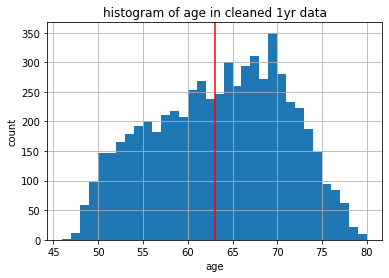

In [ ]:
df_1yr_fil['21003-2.0'].hist(bins=int(max(df_1yr_fil['21003-2.0']) - min(df_1yr_fil['21003-2.0'])))
  # make a bin for each integer age
plt.title('histogram of age in cleaned 1yr data')
plt.axvline(x=np.mean(df_1yr_fil['21003-2.0']), color = "red")
plt.xlabel('age')
plt.ylabel('count')

# look into into sex after all cleaning

age has the feature ID `31-0.0`

## 1 year data

In [ ]:
df_1yr_fil['31-0.0'].isnull().sum()
# our sex columns contains missing values

0

Text(0, 0.5, 'count')

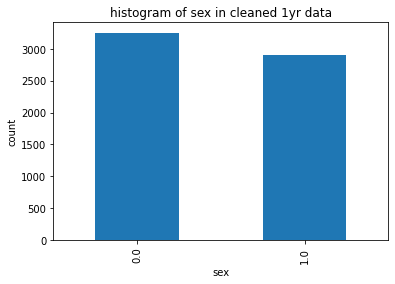

In [ ]:
df_1yr_fil['31-0.0'].value_counts().plot(kind='bar')
plt.title('histogram of sex in cleaned 1yr data')
# plt.axvline(x=np.mean(df_1yr_fil['21003-2.0']), color = "red")
plt.xlabel('sex')
plt.ylabel('count')